# 稲垣数理統計 Chapter11 問題

In [31]:
%matplotlib inline
import math
import numpy as np
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 13
# 日本語対応
mpl.rcParams['font.family'] = 'Osaka'

## 11.1(1)

身長を体重に回帰せよ. 身長が1cm伸びると体重は何kg重くなると推測できるか.

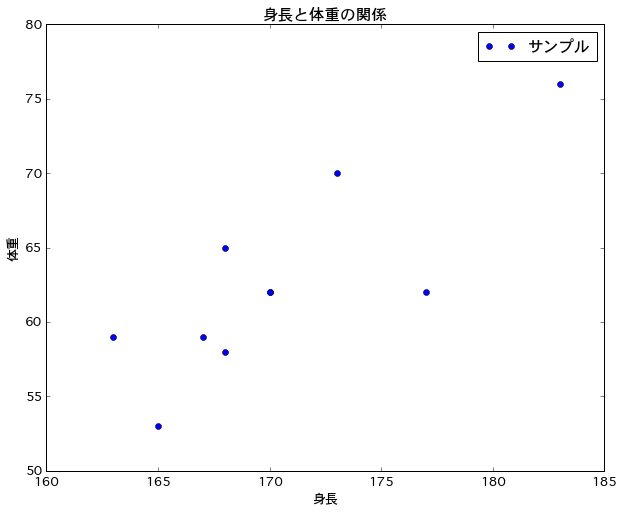

In [17]:
data = np.array([
        [167, 59], 
        [168, 58], 
        [168, 65], 
        [183, 76], 
        [170, 62], 
        [165, 53], 
        [163, 59], 
        [173, 70], 
        [177, 62],
        [170, 62],
])

fig, ax = plt.subplots(figsize=(10, 8))
plt.title("身長と体重の関係")

plt.xlabel("身長")
plt.ylabel("体重")
plt.plot(data[:, 0], data[:, 1], 'o', color='b', linewidth=1, label="サンプル")
plt.legend()
plt.show()

In [18]:
def regression_1d(data):
    """y=a+bx の形に回帰する
    
    Output:
        coefs: [a, b] 最小二乗推定値
    """
    data = np.asarray(data)
    size = data.shape[0]

    ave_x = np.mean(data[:, 0])
    ave_y = np.mean(data[:, 1])
    cov_mat = np.cov(data[:, 0], data[:, 1], ddof=0)
    cov_xy = cov_mat[0][1]
    var_x = cov_mat[0][0]

    b = cov_xy / var_x
    a = ave_y - b * ave_x

    return a, b

In [25]:
a, b = regression_1d(data)
print("回帰直線は, y=", a, "+", b, "× x")

回帰直線は, y= -88.5195954488 + 0.886852085967 × x


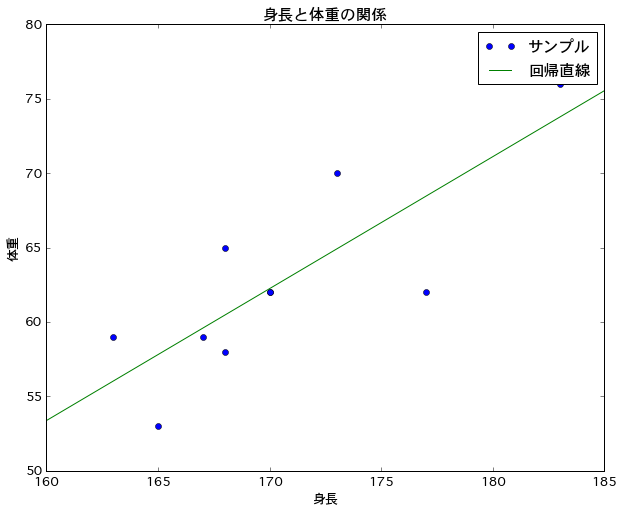

In [71]:
reg_func = lambda x: a + b * x
s = np.linspace(160, 185, 2)
y_s = reg_func(s)

fig, ax = plt.subplots(figsize=(10, 8))
plt.title("身長と体重の関係")

plt.xlabel("身長")
plt.ylabel("体重")
plt.plot(data[:, 0], data[:, 1], 'o', color='b', linewidth=1, label="サンプル")
plt.plot(s, y_s, color='g', linewidth=1, label="回帰直線")
plt.legend()
plt.show()

身長が5cm伸びると, 体重は平均どのくらい増えるか.

In [72]:
print(5 * b)

4.43426042984


## 11.1(2)

回帰係数a, bの推定値の95%信頼区間を示せ.

In [73]:
def compute_squares(data):
    """
    memo: bootstrap estimator, montecarlo(?) 
    Output:
        [total, reg, res] 総変動, 回帰変動, 残差平方和
    """
    data = np.asarray(data)
    x = data[:, 0]
    y = data[:, 1]
    size = data.shape[0]

    a, b = regression_1d(data)

    y_hat = np.zeros(size, dtype=float)
    for i in range(size):
        y_hat[i] = a + b * x[i]

    total_squares = size * np.var(y, ddof=0)
    reg_squares = size * np.var(y_hat, ddof=0)
    err_squares = total_squares - reg_squares

    return total_squares, reg_squares, err_squares

回帰係数$b$ の推定値 $\hat{b}$ は, 誤差分散の推定値 $\hat{\sigma^2} = \frac{1}{n-2} \Delta_0^2$ （ただし, $\Delta_0^2$ は残差平方和）に対して,

$$
\begin{eqnarray}
T_b = \sqrt{n}(\hat{b} - b) \times \left( \cfrac{\sqrt{\hat{\sigma^2}}}{\sqrt{S^2_x}} \right)^{-1} \sim t_{n-2}
\end{eqnarray}
$$

となる.

余談: 決定係数は

In [102]:
total, reg, err_squares = compute_squares(data)

print(reg / total)

0.654181638597


In [74]:
_, _, err_squares = compute_squares(data)
err_var_hat = err_squares / 8
var_x = np.var(data[:, 0], ddof=0)

sigma = math.sqrt(err_var_hat / var_x / 10)
print(b, sigma)

print("bの95%信頼区間は, ", stats.t.interval(0.95, 8, loc=b, scale=sigma))

0.886852085967 0.22797175760426952
bの95%信頼区間は,  (0.36114827026085949, 1.4125559016734008)


In [75]:
print(0.887 + 0.526)

1.413


回帰係数$a$ の推定値 $\hat{a}$ は, 

$$
\begin{eqnarray}
T_a = \sqrt{n}(\hat{a} - a) \times \left( \sqrt{\hat{\sigma^2}} \sqrt{1 + \left(\cfrac{\bar{x}}{\sqrt{S^2_x}} \right)^2} \right)^{-1} \sim t_{n-2}
\end{eqnarray}
$$

となる.

In [76]:
_, _, err_squares = compute_squares(data)
err_var_hat = err_squares / 8
mean_x = np.mean(data[:, 0])
var_x = np.var(data[:, 0], ddof=0)

sigma2 = math.sqrt(err_var_hat * (1 + math.pow(mean_x/math.sqrt(var_x), 2)) / 10)
print(a, sigma2)

print("aの95%信頼区間は, ", stats.t.interval(0.95, 8, loc=a, scale=sigma2))

-88.5195954488 38.867546716763506
aの95%信頼区間は,  (-178.14831889625833, 1.1091279986603695)


## 11.1(3)

体重の95%信頼限界曲線を示せ.

回帰直線の $1-\alpha$ 信頼区間は, 

$$
\begin{eqnarray}
I_y = \hat{a} + \hat{b} x \pm t_{n-2, \alpha} \times \frac{\hat{\sigma}}{\sqrt{n}} \sqrt{1 + \left(\cfrac{x - \bar{x}}{\sqrt{S^2_x}} \right)^2}
\end{eqnarray}
$$

であり, 

In [93]:
t_lower, t_upper = stats.t.interval(0.95, 8, loc=0, scale=1)

sigma_hat = math.sqrt(err_var_hat)
s_x = math.sqrt(var_x)
print("回帰直線の 1-α 信頼区間は, ")
print(a, "+", b, "x ±", t_upper*sigma_hat/math.sqrt(10), "*(1 + ((x-", mean_x, ")/", s_x, ")^2 )^0.5")

upper_y = lambda x: a + b * x + t_upper * math.sqrt(err_var_hat / 10 * (1 + pow((x - mean_x)/s_x, 2)))
lower_y  = lambda x: a + b * x + t_lower * math.sqrt(err_var_hat / 10 * (1 + pow((x - mean_x)/s_x, 2)))

回帰直線の 1-α 信頼区間は, 
-88.5195954488 + 0.886852085967 x ± 2.95705475744 *(1 + ((x- 170.4 )/ 5.624944444170094 )^2 )^0.5


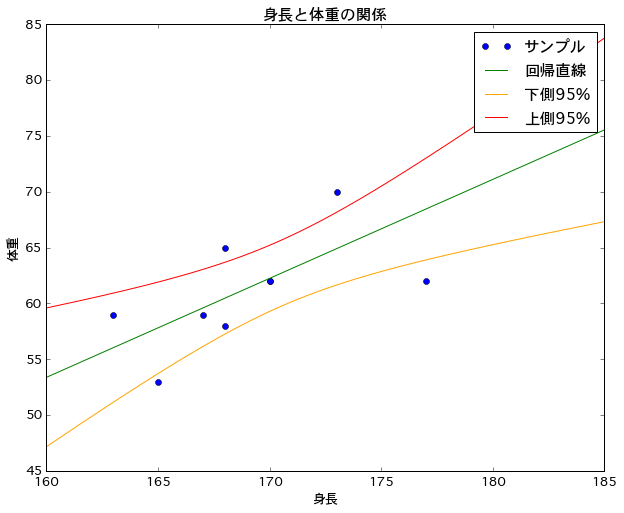

In [101]:
reg_func = lambda x: a + b * x
s = np.linspace(160, 185, 200)
y_s = reg_func(s)
l_s = [lower_y(x) for x in s]
u_s = [upper_y(x) for x in s]

fig, ax = plt.subplots(figsize=(10, 8))
plt.title("身長と体重の関係")

plt.xlabel("身長")
plt.ylabel("体重")
plt.plot(data[:, 0], data[:, 1], 'o', color='b', linewidth=1, label="サンプル")
plt.plot(s, y_s, color='g', linewidth=1, label="回帰直線")
plt.plot(s, l_s, color='orange', linewidth=1, label="下側95%")
plt.plot(s, u_s, color='red', linewidth=1, label="上側95%")
plt.legend()
plt.show()

## 11.2

In [106]:
x = data[:, 0]
y = data[:, 1]
y_hat = np.zeros(10, dtype=float)
for i in range(10):
    y_hat[i] = a + b * x[i]
    
errors = y - y_hat

print(errors)

[-0.58470291 -2.47155499  4.52844501  2.22566372 -0.24525917 -4.81099874
  2.96270544  5.09418458 -6.45322377 -0.24525917]


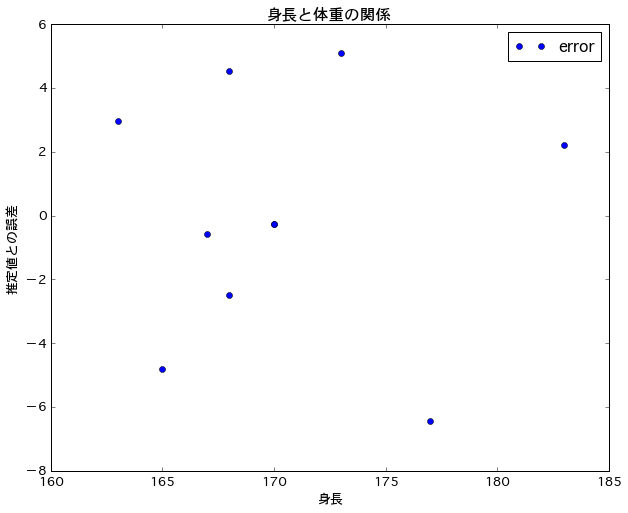

In [107]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title("身長と体重の関係")

plt.xlabel("身長")
plt.ylabel("推定値との誤差")
plt.plot(data[:, 0], errors, 'o', color='b', linewidth=1, label="error")
plt.legend()
plt.show()

In [110]:
error_v = np.var(errors, ddof=0)
sigma_2 = np.sqrt(error_v) * 2

print(np.mean(errors), sigma_2)

2.84217094304e-15 7.25394526248


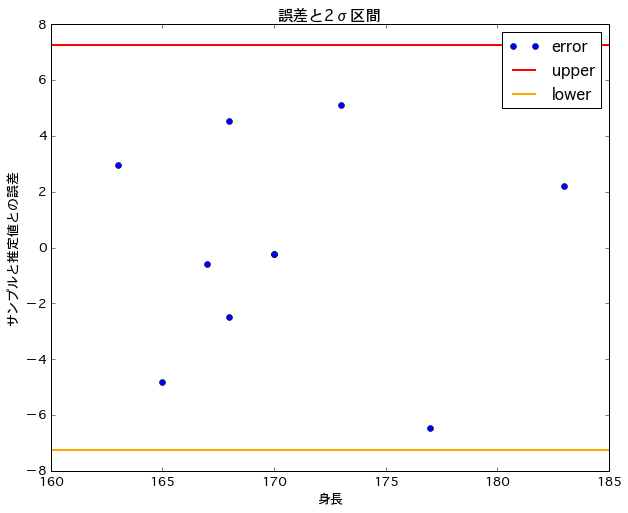

In [116]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title("誤差と2σ区間")

plt.xlabel("身長")
plt.ylabel("サンプルと推定値との誤差")
plt.plot(data[:, 0], errors, 'o', color='b', linewidth=1, label="error")
plt.plot([160, 185], [sigma_2, sigma_2], color='r', linewidth=2, label="upper")
plt.plot([160, 185], [-1 * sigma_2, -1 * sigma_2], color='orange', linewidth=2, label="lower")
plt.legend()
plt.show()